# Back order Prediction 

In [99]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [100]:
# " due to my low end pc i am not consedering entire dataset and it's features . 
data = pd.read_csv("C:/Users/admin/Desktop/Back-Order-Prediction-iNeuron-master/data.csv",
                  usecols = ['potential_issue', 'deck_risk', 'oe_constraint',
                             'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder',
                            "national_inv","lead_time","in_transit_qty","min_bank","pieces_past_due","local_bo_qty"]
                  ,nrows = 160000)
data = pd.DataFrame(data)

In [101]:
data.head()

,national_inv,lead_time,in_transit_qty,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,NaN,0,0,No,0,0,No,No,No,Yes,No,No
1,2,9.0,0,0,No,0,0,No,No,No,Yes,No,No
2,2,NaN,0,0,No,0,0,Yes,No,No,Yes,No,No
3,7,8.0,0,1,No,0,0,No,No,No,Yes,No,No
4,8,NaN,0,2,No,0,0,Yes,No,No,Yes,No,No


In [102]:
print("Number of rows  : ",data.shape[0])
print("Number of cols  : ",data.shape[1])

Number of rows  :  160000
Number of cols  :  13


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   national_inv       160000 non-null  int64  
 1   lead_time          150363 non-null  float64
 2   in_transit_qty     160000 non-null  int64  
 3   min_bank           160000 non-null  int64  
 4   potential_issue    160000 non-null  object 
 5   pieces_past_due    160000 non-null  int64  
 6   local_bo_qty       160000 non-null  int64  
 7   deck_risk          160000 non-null  object 
 8   oe_constraint      160000 non-null  object 
 9   ppap_risk          160000 non-null  object 
 10  stop_auto_buy      160000 non-null  object 
 11  rev_stop           160000 non-null  object 
 12  went_on_backorder  160000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 11.6+ MB


In [104]:
# Printing Numerical Features
num_col = []
print("Numerical Features : \n ")
for i in data.columns:
    if(data[i].dtype=="float64" or data[i].dtype=="int64"):
        print(i)
        num_col.append(i)

Numerical Features : 
 
national_inv
lead_time
in_transit_qty
min_bank
pieces_past_due
local_bo_qty


In [105]:
# Printing Categorical Features
cat_var= []
for i in data.columns:
    if(data[i].dtype=='object'):
        cat_var.append(i)
print("Categorical Features : {} \n ".format(len(cat_var)))
print(cat_var)

Categorical Features : 7 
 
['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [106]:
# data Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,160000.0,551.990037,36119.488776,-13491.0,4.0,15.0,81.0,12334404.0
lead_time,150363.0,7.862180,7.028825,0.0,4.0,8.0,9.0,52.0
in_transit_qty,160000.0,44.209063,1298.224715,0.0,0.0,0.0,0.0,288960.0
min_bank,160000.0,56.996856,1439.688754,0.0,0.0,0.0,3.0,309667.0
pieces_past_due,160000.0,2.121856,221.699684,0.0,0.0,0.0,0.0,74084.0
local_bo_qty,160000.0,0.671925,37.042995,0.0,0.0,0.0,0.0,10024.0


In [107]:
# Missing value Percentage from each column .

missing_val_percent = data.isnull().sum()*100/len(data) 
missing_data = pd.DataFrame({"col_names":data.columns,
                             'missing_val_percent': missing_val_percent})
missing_data

,col_names,missing_val_percent
national_inv,national_inv,0.000000
lead_time,lead_time,6.023125
in_transit_qty,in_transit_qty,0.000000
min_bank,min_bank,0.000000
potential_issue,potential_issue,0.000000
pieces_past_due,pieces_past_due,0.000000
local_bo_qty,local_bo_qty,0.000000
deck_risk,deck_risk,0.000000
oe_constraint,oe_constraint,0.000000
ppap_risk,ppap_risk,0.000000


In [108]:
# impute numerical features which are having missing values with it's mean value 
for i in num_col:
    data[i] = data[i].fillna(data[i].mean())

In [109]:
#  categorical  features which are having missing values
data[cat_var].isnull().sum()

potential_issue      0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [110]:
print("Unique Value's in each categorical columns  : \n" )
for i in  cat_var:
    print("column name : ",i)
    print(data[i].value_counts())
    print("\n ***************************************** \n ")

Unique Value's in each categorical columns  : 

column name :  potential_issue
No     159926
Yes        74
Name: potential_issue, dtype: int64

 ***************************************** 
 
column name :  deck_risk
No     121884
Yes     38116
Name: deck_risk, dtype: int64

 ***************************************** 
 
column name :  oe_constraint
No     159978
Yes        22
Name: oe_constraint, dtype: int64

 ***************************************** 
 
column name :  ppap_risk
No     140328
Yes     19672
Name: ppap_risk, dtype: int64

 ***************************************** 
 
column name :  stop_auto_buy
Yes    154351
No       5649
Name: stop_auto_buy, dtype: int64

 ***************************************** 
 
column name :  rev_stop
No     159936
Yes        64
Name: rev_stop, dtype: int64

 ***************************************** 
 
column name :  went_on_backorder
No     158395
Yes      1605
Name: went_on_backorder, dtype: int64

 ***************************************** 
 


In [111]:
# let's fill rows with missing value from categorical value ,
data['potential_issue'] = data.potential_issue.fillna('No')
data['deck_risk'] = data.deck_risk.fillna('No')
data['oe_constraint'] = data.oe_constraint.fillna('No')
data['ppap_risk'] = data.ppap_risk.fillna('No')
data['stop_auto_buy'] = data.stop_auto_buy.fillna("Yes")
data['rev_stop'] = data.rev_stop.fillna('No')
data['went_on_backorder'] = data.went_on_backorder.fillna('No')

Feature Extraction using PCA

In [112]:
# apply scaling on  numerical features . 
num_data = data[num_col]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(num_data)

In [113]:
scaled_data = pd.DataFrame(scaled_data,columns  = num_data.columns)
scaled_data.head()

,national_inv,lead_time,in_transit_qty,min_bank,pieces_past_due,local_bo_qty
0,-0.015282,2.606984e-16,-0.034054,-0.039590,-0.009571,-0.018139
1,-0.015227,1.669866e-01,-0.034054,-0.039590,-0.009571,-0.018139
2,-0.015227,2.606984e-16,-0.034054,-0.039590,-0.009571,-0.018139
3,-0.015089,2.022646e-02,-0.034054,-0.038895,-0.009571,-0.018139
4,-0.015061,2.606984e-16,-0.034054,-0.038201,-0.009571,-0.018139


In [114]:
# import PCA 
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)


In [115]:
pca.explained_variance_ratio_

array([0.3530604 , 0.17038916, 0.16660252, 0.16586996, 0.12229103,
       0.02178694])

In [116]:
np.cumsum(pca.explained_variance_ratio_)

array([0.3530604 , 0.52344956, 0.69005207, 0.85592203, 0.97821306,
       1.        ])

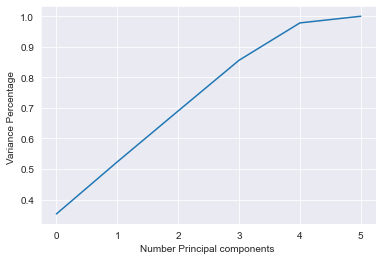

In [117]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number Principal components ")
plt.ylabel("Variance Percentage ")
plt.show()

In [118]:
pca =  PCA(n_components = 4)
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_data,
columns =['PC1','PC2','PC3','PC4'])
print(pca_data.shape[0])
pca_data.head()

160000


,PC1,PC2,PC3,PC4
0,-0.054647,0.003410,-0.005431,-0.015428
1,-0.055828,0.034525,0.151834,-0.062017
2,-0.054629,0.003452,-0.005434,-0.015412
3,-0.054276,0.007398,0.013599,-0.020996
4,-0.053670,0.003733,-0.005461,-0.015323


In [119]:
# Convert all catergorical variable to numeric variable.

In [120]:

data['potential_issue'] = data['potential_issue'].map({"No":0,"Yes":1})
data["deck_risk"]       = data["deck_risk"].map({"No":0,"Yes":1})
data["oe_constraint"]   = data["oe_constraint"].map({"No":0,"Yes":1})
data["ppap_risk"]       = data["ppap_risk"].map({"No":0,"Yes":1})
data["stop_auto_buy"]   = data["stop_auto_buy"].map({"No":0,"Yes":1})
data["rev_stop"]        = data["rev_stop"].map({"No":0,"Yes":1})
data["went_on_backorder"] = data["went_on_backorder"].map({"No":0,"Yes":1})

In [121]:
# Creating new DataFrame by combining PCA + Categorical Features
cat_data = data[cat_var]
num_data = pca_data
print("categorical data shape : ",cat_data.shape)
cat_data.head()

categorical data shape :  (160000, 7)


,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0


In [122]:
print("numerical   data shape : ",num_data.shape)
num_data.head()

numerical   data shape :  (160000, 4)


,PC1,PC2,PC3,PC4
0,-0.054647,0.003410,-0.005431,-0.015428
1,-0.055828,0.034525,0.151834,-0.062017
2,-0.054629,0.003452,-0.005434,-0.015412
3,-0.054276,0.007398,0.013599,-0.020996
4,-0.053670,0.003733,-0.005461,-0.015323


In [123]:
# concate both cat_data and num_data 
new_data = pd.concat([cat_data,num_data],axis = 1)
print("new data shape : ",new_data.shape )
new_data.head()

new data shape :  (160000, 11)


,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,PC1,PC2,PC3,PC4
0,0,0,0,0,1,0,0,-0.054647,0.003410,-0.005431,-0.015428
1,0,0,0,0,1,0,0,-0.055828,0.034525,0.151834,-0.062017
2,0,1,0,0,1,0,0,-0.054629,0.003452,-0.005434,-0.015412
3,0,0,0,0,1,0,0,-0.054276,0.007398,0.013599,-0.020996
4,0,1,0,0,1,0,0,-0.053670,0.003733,-0.005461,-0.015323


our target is highly imbalanced
0    158395
1      1605
Name: went_on_backorder, dtype: int64


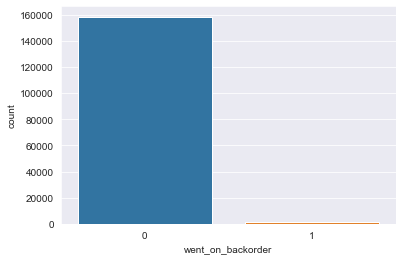

In [124]:
# check whether our target is Balanced or not 
print("our target is highly imbalanced")
print(new_data["went_on_backorder"].value_counts())
sns.countplot(new_data["went_on_backorder"])
plt.show()

In [125]:
# for simplicity purpose i'll use undersampling technique to make our target balanced ,where target = 0
target_zero = new_data[new_data["went_on_backorder"]==0]
target_one  = new_data[new_data["went_on_backorder"]==1]

1    1605
0    1605
Name: went_on_backorder, dtype: int64


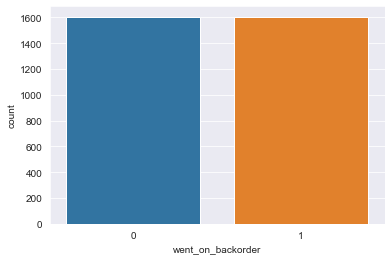

In [132]:
print("Our Target is Balanced : ")
under_sample = target_zero.sample(n= len(target_one))
model_data = pd.concat([under_sample,target_one],axis = 0)
print(model_data["went_on_backorder"].value_counts())
sns.countplot(model_data["went_on_backorder"])
plt.show()

# Model Building 

In [134]:
x = model_data.drop(["went_on_backorder"],axis = 1)
y = model_data['went_on_backorder']

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,log_loss
from sklearn.metrics import roc_auc_score,roc_curve

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 33)
print("Train Set Size : ",xtrain.shape)
print("Train Target Set Size : ",ytrain.shape)
print("Test  Set Size : ",xtest.shape)
print("Test  Target Set Size : ",ytest.shape)

Train Set Size :  (2247, 10)
Train Target Set Size :  (2247,)
Test  Set Size :  (963, 10)
Test  Target Set Size :  (963,)


In [154]:

# Importing GridSearchCv from sklearn in order to find out the optimal Parameter for given Algorithm
# that gives best result .

from sklearn.model_selection import GridSearchCV

# Logistic Regresssion

In [138]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 33 )

# Setting Parameters for Logistic Regression . 

params = {    # Regularization Params
             'penalty' : ['l1','l2','elasticnet'],
              # Lambda Value 
             'C' : [0.01,0.1,1,10,100]
         }

log_reg = GridSearchCV(lr,param_grid = params,cv = 10)
log_reg.fit(xtrain,ytrain)
log_reg.best_params_

{'C': 100, 'penalty': 'l2'}

In [139]:
# Make Prediction of test data 
ypred = log_reg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.52      0.75      0.62       465
           1       0.61      0.37      0.46       498

    accuracy                           0.55       963
   macro avg       0.57      0.56      0.54       963
weighted avg       0.57      0.55      0.53       963



In [ ]:
print("cost function for Logistic reg ")
print(log_loss(ytest,ypred))

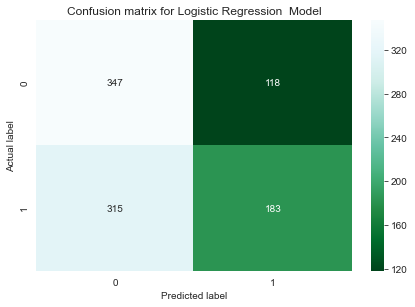

In [140]:
plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Decision Tree

In [141]:

from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(random_state = 33)


# Setting Parameters for DecisionTreeClassifier . 

params = {  
             'criterion'    : ["gini", "entropy"],
             'max_features' : ["auto", "sqrt", "log2"],
              'min_samples_split' :[i for i in range(4,16)],
              'min_samples_leaf' : [i for i in range(4,16)]
         }

dt_clf = GridSearchCV(dt,param_grid = params,cv = 10)
dt_clf.fit(xtrain,ytrain)
dt_clf.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 14}

In [142]:
# Make Prediction of test data 
ypred = dt_clf.predict(xtest)
print(classification_report(ytest,ypred))
# did you saw see that accuracy increased in applying decision tree .

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       465
           1       0.75      0.54      0.63       498

    accuracy                           0.67       963
   macro avg       0.69      0.67      0.66       963
weighted avg       0.69      0.67      0.66       963



In [ ]:
print("cost function for Decision Tree")
print(log_loss(ytest,ypred))

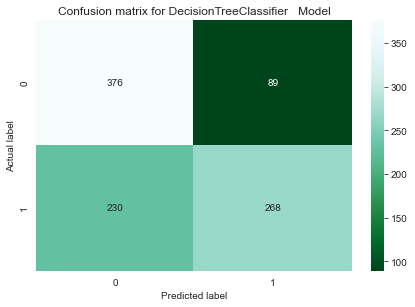

In [143]:

plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DecisionTreeClassifier   Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# RandomForestClassifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200,min_samples_split = 20,min_samples_leaf = 5,random_state = 33)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [156]:
ypred = rf.predict(xtest)

In [157]:
print("classification - report ")
print(classification_report(ytest,ypred))
print("that's great accuracy got increased !!!")

classification - report 
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       465
           1       0.75      0.70      0.73       498

    accuracy                           0.73       963
   macro avg       0.73      0.73      0.73       963
weighted avg       0.73      0.73      0.73       963

that's great accuracy got increased !!!


In [158]:
print("confusion matrix  - report ")
print(confusion_matrix(ytest,ypred))

confusion matrix  - report 
[[350 115]
 [148 350]]


In [159]:
print("cost function for Random Forest ")
print(log_loss(ytest,ypred))

cost function 
9.432803889476617


# Thank You ,
# Keep Learning